In [82]:
import rasterio
import rasterstats
import fiona as f
import numpy as np
from matplotlib import pyplot
from pprint import pprint
from stac import STAC

In [2]:
from rasterstats import zonal_stats, point_query

In [3]:
stac_client = STAC('http://brazildatacube.dpi.inpe.br/bdc-stac/0.8.0/')

In [4]:
collection = stac_client.collection('C4_64_16D_MED')

In [5]:
items = collection.get_items()

In [64]:
pprint(items.features[0])

{'assets': {'blue': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C4_64_16D_MED/083100/2019-12-19_2019-12-31/C4_64_16D_MED_083100_2019-12-19_2019-12-31_blue.tif'},
            'cnc': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C4_64_16D_MED/083100/2019-12-19_2019-12-31/C4_64_16D_MED_083100_2019-12-19_2019-12-31_cnc.tif'},
            'evi': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C4_64_16D_MED/083100/2019-12-19_2019-12-31/C4_64_16D_MED_083100_2019-12-19_2019-12-31_evi.tif'},
            'green': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C4_64_16D_MED/083100/2019-12-19_2019-12-31/C4_64_16D_MED_083100_2019-12-19_2019-12-31_green.tif'},
            'ndvi': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C4_64_16D_MED/083100/2019-12-19_2019-12-31/C4_64_16D_MED_083100_2019-12-19_2019-12-31_ndvi.tif'},
            'nir': {'href': 'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/C4_64_16D_MED/083100/

In [132]:
red = items.features[0].assets['red'].download()
green = items.features[0].assets['green'].download()
blue = items.features[0].assets['blue'].download()
ndvi = items.features[0].assets['ndvi'].download()

In [7]:
rasterio.open(red).read(1)

array([[413, 418, 420, ..., 817, 729, 706],
       [420, 423, 422, ..., 831, 761, 702],
       [423, 414, 406, ..., 853, 786, 698],
       ...,
       [774, 808, 703, ..., 717, 717, 629],
       [768, 775, 672, ..., 755, 721, 661],
       [685, 627, 586, ..., 745, 714, 669]], dtype=int16)

In [65]:
red

'C4_64_16D_MED_083100_2019-12-19_2019-12-31_red.tif'

In [133]:
r = rasterio.open(red).read(1)
g = rasterio.open(green).read(1)
b = rasterio.open(blue).read(1)
vi = rasterio.open(ndvi).read(1)

In [40]:
r.max()

4369

In [90]:
with rasterio.open(red) as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()

    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            dataset.crs, 'EPSG:4326', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        pprint(geom)

{'coordinates': [[[-55.866342, -14.361561],
                  [-55.866405, -14.36366],
                  [-55.865098, -14.363685],
                  [-55.865113, -14.36421],
                  [-55.863806, -14.364235],
                  [-55.86379, -14.36371],
                  [-55.864444, -14.363698],
                  [-55.864413, -14.362648],
                  [-55.86572, -14.362623],
                  [-55.865688, -14.361573],
                  [-55.866342, -14.361561]]],
 'type': 'Polygon'}
{'coordinates': [[[-55.521687, -14.639978],
                  [-55.521731, -14.641552],
                  [-55.521076, -14.641564],
                  [-55.521032, -14.63999],
                  [-55.521687, -14.639978]]],
 'type': 'Polygon'}
{'coordinates': [[[-55.566344, -14.736279],
                  [-55.566389, -14.737853],
                  [-55.565734, -14.737865],
                  [-55.56569, -14.736291],
                  [-55.566344, -14.736279]]],
 'type': 'Polygon'}
{'coordinates': [

{'coordinates': [[[-55.734304, -14.877514],
                  [-55.73432, -14.878038],
                  [-55.733664, -14.878051],
                  [-55.733649, -14.877526],
                  [-55.734304, -14.877514]]],
 'type': 'Polygon'}
{'coordinates': [[[-55.590776, -14.880182],
                  [-55.590791, -14.880706],
                  [-55.58948, -14.88073],
                  [-55.589465, -14.880206],
                  [-55.590776, -14.880182]]],
 'type': 'Polygon'}
{'coordinates': [[[-55.600622, -14.880526],
                  [-55.600637, -14.88105],
                  [-55.599981, -14.881062],
                  [-55.599966, -14.880538],
                  [-55.600622, -14.880526]]],
 'type': 'Polygon'}
{'coordinates': [[[-55.605224, -14.880966],
                  [-55.60527, -14.88254],
                  [-55.604614, -14.882552],
                  [-55.604629, -14.883076],
                  [-55.603974, -14.883088],
                  [-55.603959, -14.882564],
                

 'type': 'Polygon'}
{'coordinates': [[[-55.594098, -14.996116],
                  [-55.594129, -14.997165],
                  [-55.593473, -14.997177],
                  [-55.593443, -14.996128],
                  [-55.594098, -14.996116]]],
 'type': 'Polygon'}
{'coordinates': [[[-55.685603, -15.006495],
                  [-55.685618, -15.00702],
                  [-55.686274, -15.007007],
                  [-55.686335, -15.009106],
                  [-55.683712, -15.009155],
                  [-55.683697, -15.00863],
                  [-55.683041, -15.008642],
                  [-55.682995, -15.007069],
                  [-55.683651, -15.007056],
                  [-55.683635, -15.006532],
                  [-55.685603, -15.006495]]],
 'type': 'Polygon'}
{'coordinates': [[[-55.685054, -15.010179],
                  [-55.6851, -15.011753],
                  [-55.685756, -15.011741],
                  [-55.685802, -15.013314],
                  [-55.685146, -15.013327],
                

                  [-54.692591, -14.858601],
                  [-54.69254, -14.856502],
                  [-54.691885, -14.856512],
                  [-54.691229, -14.856522],
                  [-54.691217, -14.855998],
                  [-54.689906, -14.856018],
                  [-54.689931, -14.857067],
                  [-54.689276, -14.857077],
                  [-54.689314, -14.858651],
                  [-54.688658, -14.858661],
                  [-54.688633, -14.857612],
                  [-54.687978, -14.857622],
                  [-54.687322, -14.857632],
                  [-54.687297, -14.856583],
                  [-54.685331, -14.856613],
                  [-54.685344, -14.857138],
                  [-54.684688, -14.857148],
                  [-54.684676, -14.856623],
                  [-54.68402, -14.856633],
                  [-54.683365, -14.856643],
                  [-54.683315, -14.854545],
                  [-54.681349, -14.854575],
                  [-54.681361, -14

In [41]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

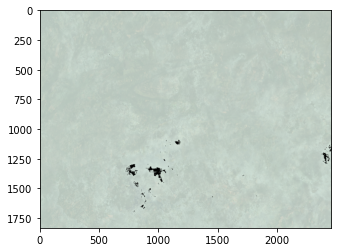

In [49]:
rgb = np.dstack((normalize(r), normalize(g), normalize(b)))
pyplot.imshow(rgb)

In [80]:
def mean(x):
    return np.ma.mean(x)

In [107]:
stats = zonal_stats(
    'data/test/polygons/polygons.shp',
    red,
    stats="count",
    add_stats={
        'mean': mean
    },
    band=1,
    geojson_out=True
)
pprint(stats)

[{'geometry': {'coordinates': [[(-56.01824706114791, -14.375444426917133),
                                (-55.64863470267903, -14.356586653525866),
                                (-55.665606698731175, -14.635681699716653),
                                (-55.95601640895673, -14.718655902638234),
                                (-56.01824706114791, -14.543278610099431),
                                (-56.01824706114791, -14.375444426917133)]],
               'type': 'Polygon'},
  'id': '0',
  'properties': OrderedDict([('id', 1),
                             ('name', 'test1'),
                             ('count', 0),
                             ('mean', masked)]),
  'type': 'Feature'},
 {'geometry': {'coordinates': [[(-55.407255203270786, -14.594194598255859),
                                (-54.91695309509778, -14.4848195125865),
                                (-54.91883887243691, -14.984550507455134),
                                (-55.17907614523643, -14.986436284794262)

In [161]:
def custom_mean(x):
    return np.ma.mean(x)

In [162]:
stats = zonal_stats(
    'data/test/polygons/polygons.shp',
    ndvi,
    stats="count",
    add_stats={
        'my_mean': custom_mean
    },
    band=1
)
pprint(stats)

[{'count': 0, 'my_mean': masked},
 {'count': 0, 'my_mean': masked},
 {'count': 0, 'my_mean': masked}]


In [143]:
with f.open('data/test/polygons/polygons.geojson') as src:
    zs = zonal_stats(src, ndvi, band=1, stats="mean", all_touched=True)
zs

[{'mean': None}, {'mean': None}]

In [144]:
zs = zonal_stats(geom, ndvi, stats="mean", band=1)
zs

[{'mean': None}]

In [125]:
pts = point_query('data/test/points/points.shp', red, band=1)
pts

[None, None, None]